## What is SNA?
Social network analysis [SNA] is the mapping and measuring of relationships and flows between people, groups, organizations, computers, URLs, and other connected information/knowledge entities. 

### Components of Network
- Nodes: or actors, commonly represented as circles. eg. People, Organizations, Computers, etc
- Edges: or relations, commonly represented as lines between circles, the relationship between the nodes
    - Binary or Valued Relationship
    - Symmetric and Unsymmetric Relationship
    - Multimode Relationship

### Examples of Network Graphs
Some questions we consider when we do network analysis,
- What can we learn about the nodes?
- What kind of quantitative metrics can be derived from the network data?
- Whatind of quantitative or qualitative outcomes can be measured?

In [1]:
from IPython.display import display , Image

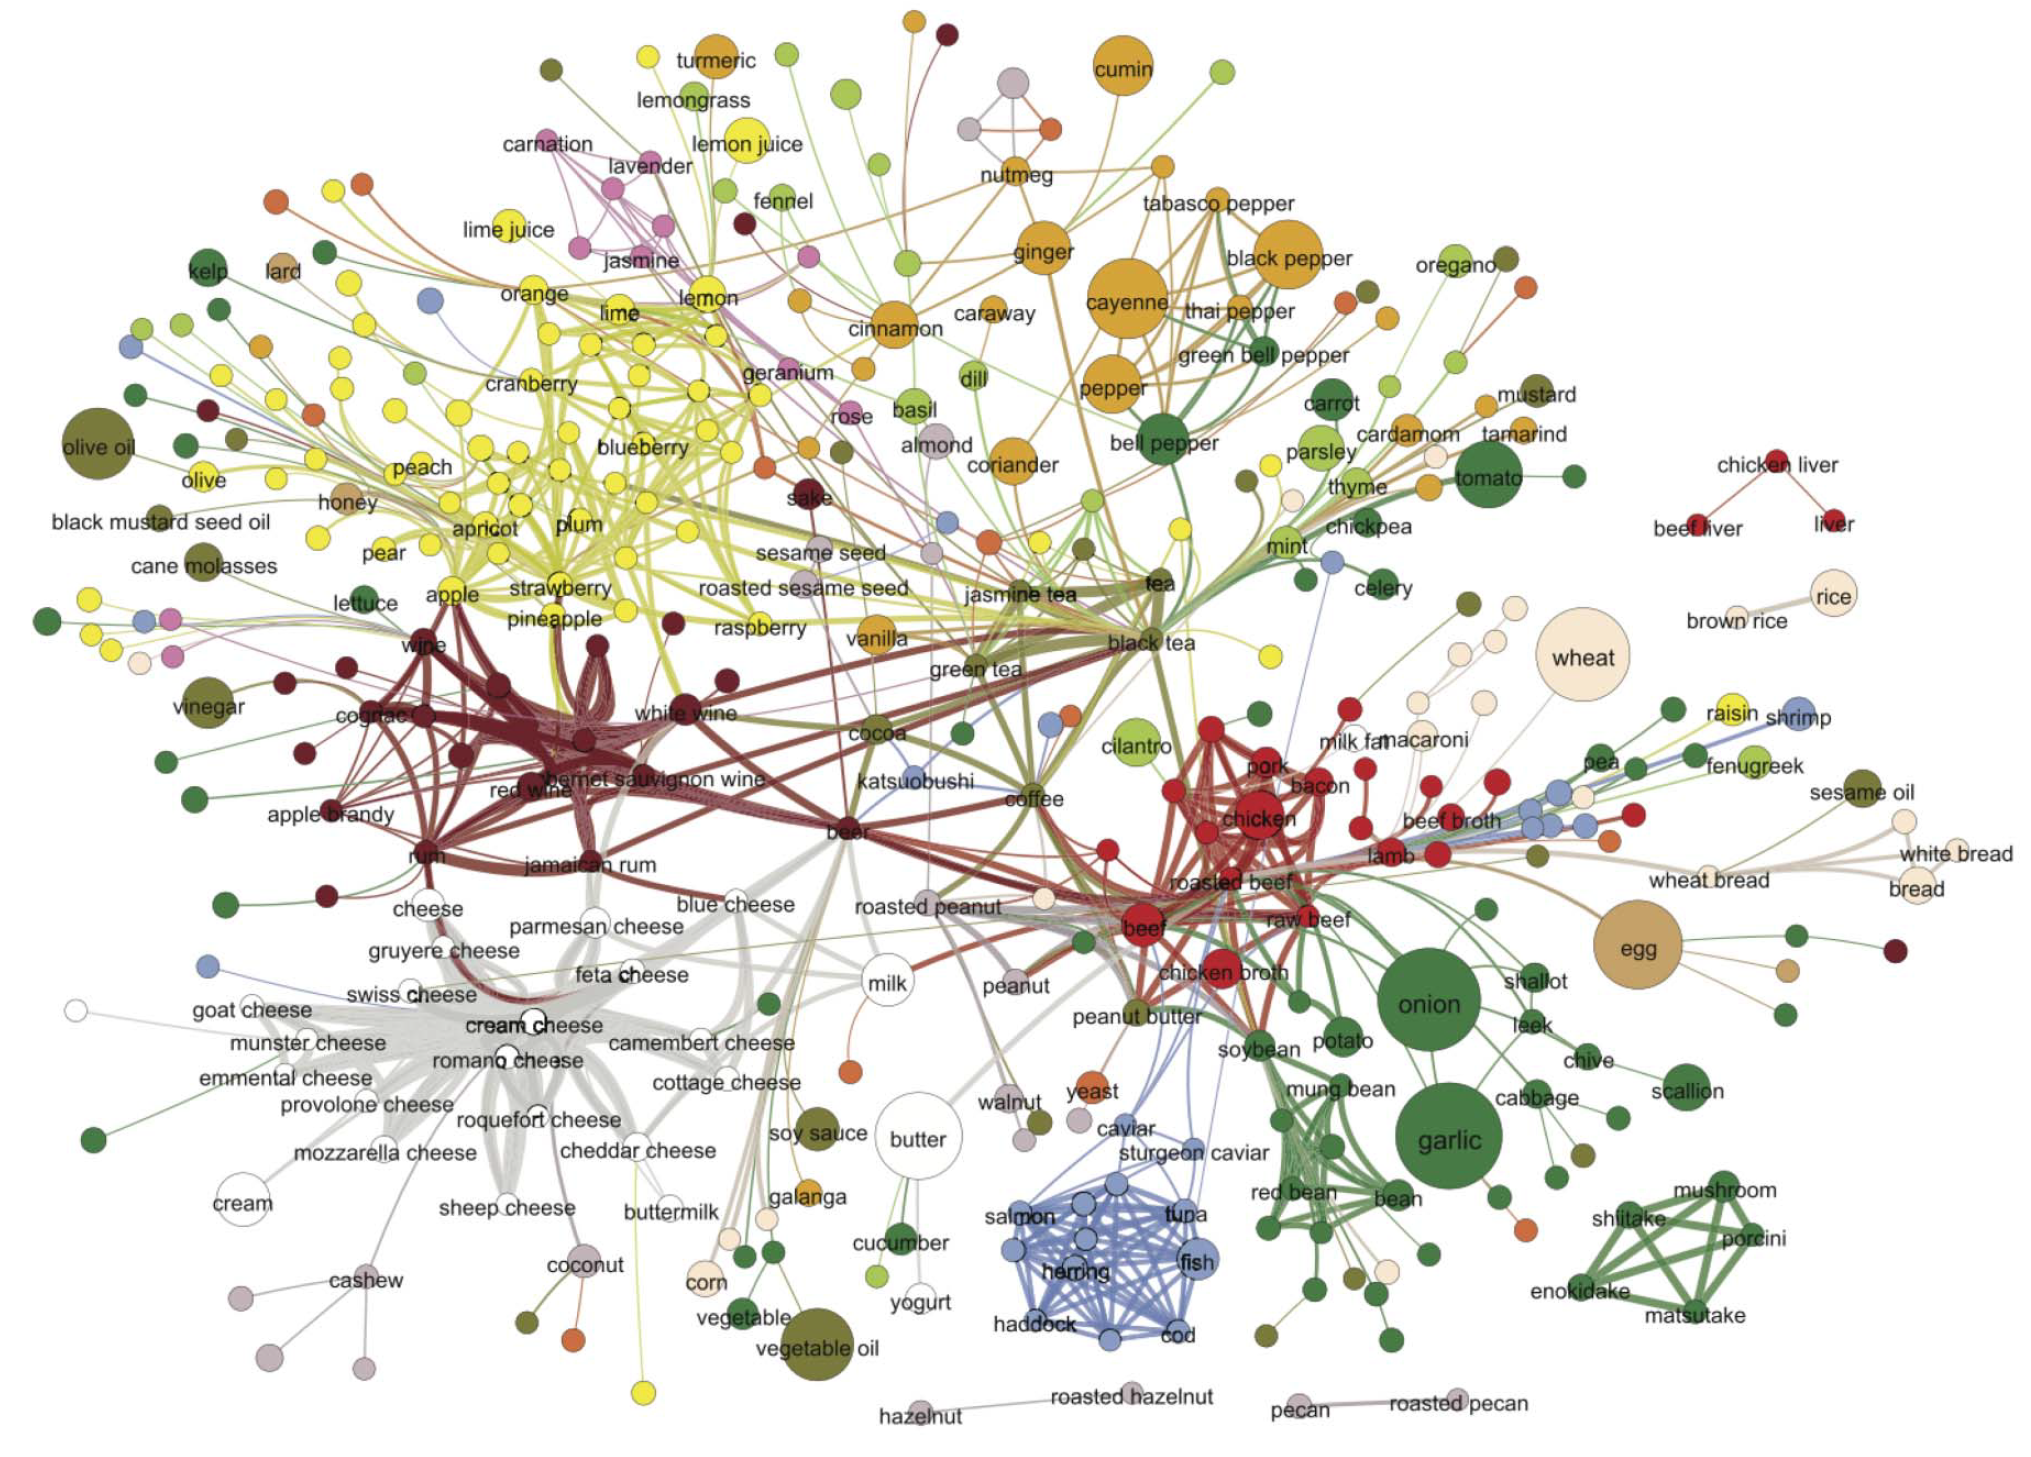

In [2]:
# A network of commonly used flavors
# The backbone of the flavor network. 
# Each node represents a different ingredient, where the size of the node represents the ingredient’s prevalence in a variety of recipes. 
# The thickness of a line between two nodes reflects the relative number of flavor compounds shared by the two ingredients.
Image("flavornetwork.png")

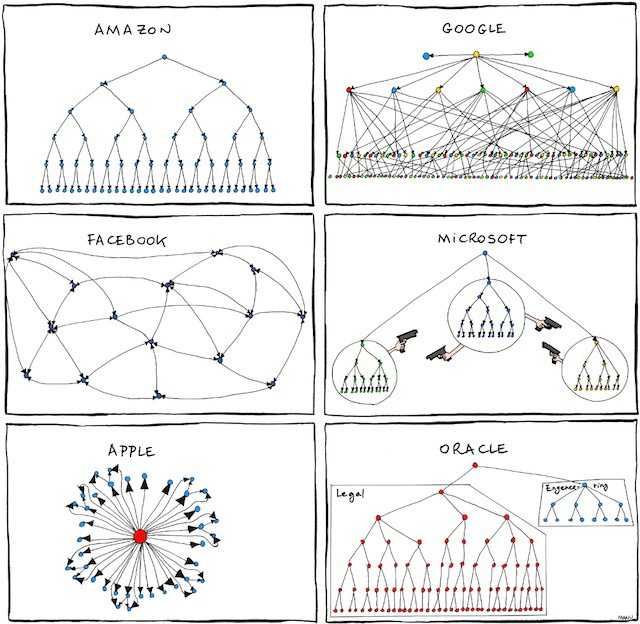

In [3]:
Image("companyorgchart.jpg")

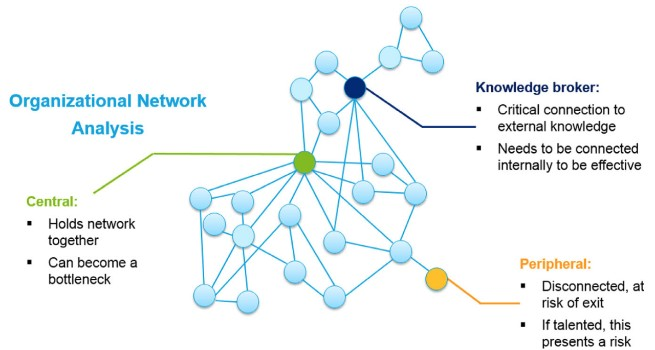

In [4]:
Image("orgchart.jpeg")

### Now, Let's Create a Graph!
One thing to note is Network analysis focuses on the relations among actors, and not individual actors and their attributes. This means that the actors are usually not sampled independently, as oppose to traditional statistical methods.

We will be using Harry Potter Character's today to learn the basics of SNA. 

In [5]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# Defining a graph
h = nx.Graph(name="Simple World of Harry Potter")

In [7]:
# Adding Nodes from a List
h.add_nodes_from(['Harry Potter','Ron Weasley', 'Ginny Weasley','Sirius Black','Lily Potter','James Potter','Hermione Granger'])

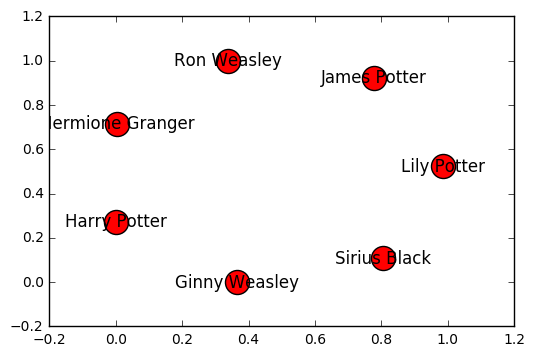

In [8]:
nx.draw_networkx(h)

In [9]:
# Add some relationships
h.add_edges_from([('Harry Potter','Ginny Weasley'),('Harry Potter','Sirius Black'),('Harry Potter','James Potter'),('Harry Potter','Lily Potter'),('Ron Weasley','Ginny Weasley'),('Ron Weasley','Hermione Granger'),('Lily Potter','James Potter')], rel_tp = 'family')

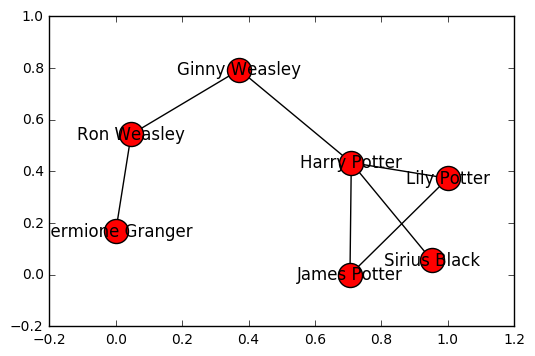

In [11]:
nx.draw_networkx(h)

In [12]:
# Everything in networkx is a dict, so you can treat everything that way
h.__dict__

{'adj': {'Ginny Weasley': {'Harry Potter': {'rel_tp': 'family'},
   'Ron Weasley': {'rel_tp': 'family'}},
  'Harry Potter': {'Ginny Weasley': {'rel_tp': 'family'},
   'James Potter': {'rel_tp': 'family'},
   'Lily Potter': {'rel_tp': 'family'},
   'Sirius Black': {'rel_tp': 'family'}},
  'Hermione Granger': {'Ron Weasley': {'rel_tp': 'family'}},
  'James Potter': {'Harry Potter': {'rel_tp': 'family'},
   'Lily Potter': {'rel_tp': 'family'}},
  'Lily Potter': {'Harry Potter': {'rel_tp': 'family'},
   'James Potter': {'rel_tp': 'family'}},
  'Ron Weasley': {'Ginny Weasley': {'rel_tp': 'family'},
   'Hermione Granger': {'rel_tp': 'family'}},
  'Sirius Black': {'Harry Potter': {'rel_tp': 'family'}}},
 'adjlist_dict_factory': dict,
 'edge': {'Ginny Weasley': {'Harry Potter': {'rel_tp': 'family'},
   'Ron Weasley': {'rel_tp': 'family'}},
  'Harry Potter': {'Ginny Weasley': {'rel_tp': 'family'},
   'James Potter': {'rel_tp': 'family'},
   'Lily Potter': {'rel_tp': 'family'},
   'Sirius Black'

In [13]:
# Show the nodes
h.nodes()

['Hermione Granger',
 'Sirius Black',
 'Harry Potter',
 'Ginny Weasley',
 'Lily Potter',
 'James Potter',
 'Ron Weasley']

In [14]:
#Look at who is connected to a node
h['Harry Potter']

{'Ginny Weasley': {'rel_tp': 'family'},
 'James Potter': {'rel_tp': 'family'},
 'Lily Potter': {'rel_tp': 'family'},
 'Sirius Black': {'rel_tp': 'family'}}

In [15]:
# Now, let's try to read in the entire Harry Potter Character set
import pandas as pd
edge_path = "./relations.csv"
edge = pd.read_csv(edge_path)

In [16]:
H = nx.Graph(name="World of Harry Potter")

In [17]:
for index, e in edge.iterrows():
    H.add_edge(e['source'],e['target'])

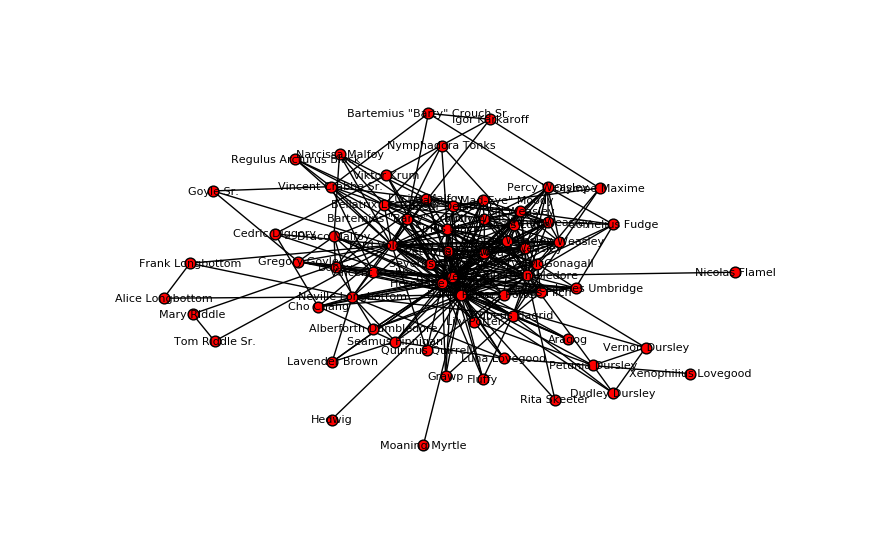

In [21]:
# Let's take a look at how the Harry Potter Characters are connected
plt.figure(figsize=(8,5))
nx.draw_spring(H,node_size=60,font_size=8,with_labels=True)

In [22]:
H['Harry Potter']

{'Alastor "Mad-Eye" Moody': {},
 'Alberforth Dumbledore': {},
 'Albus Dumbledore': {},
 'Aragog': {},
 'Argus Filch': {},
 'Arthur Weasley': {},
 'Bartemius "Barty" Crouch Jr.': {},
 'Bellatrix Lestrange': {},
 'Bill Weasley': {},
 'Cedric Diggory': {},
 'Charlie Weasley': {},
 'Cho Chang': {},
 'Cornelius Fudge': {},
 'Dobby': {},
 'Dolores Janes Umbridge': {},
 'Draco Malfoy': {},
 'Dudley Dursley': {},
 'Fleur Delacour': {},
 'Fluffy': {},
 'Fred Weasley': {},
 'George Weasley': {},
 'Ginny Weasley': {},
 'Grawp': {},
 'Gregory Goyle': {},
 'Hedwig': {},
 'Hermione Granger': {},
 'James Potter': {},
 'Lily Potter': {},
 'Lord Voldemort': {},
 'Lucius Malfoy': {},
 'Luna Lovegood': {},
 'Minerva McGonagall': {},
 'Moaning Myrtle': {},
 'Molly Weasley': {},
 'Neville Longbottom': {},
 'Peter Pettigrew': {},
 'Petunia Dursley': {},
 'Quirinus Quirrell': {},
 'Remus Lupin': {},
 'Rita Skeeter': {},
 'Ron Weasley': {},
 'Rubeus Hagrid': {},
 'Seamus Finnigan': {},
 'Severus Snape': {},
 

### Understanding the Graph
Centrality: Numeric measure of the power or influence of a node within a network. Conceptually, centrality is fairly straight forward: we want to identify which nodes are in the ‘center’ of the network.In practice, identifying exactly what we mean by ‘center’ is somewhat complicated.

#### Node Degree - the number of links incident upon a node (i.e., the number of ties that a node has).

In [23]:
# Compute Degree of Our Graph
deg = nx.degree(H)

In [24]:
# Look at the degree of our nodes
min(deg.values())

1

In [25]:
max(deg.values())

48

In [26]:
# Let's look at the top 10 celebrities in Harry Potter

In [27]:
type(deg)

dict

In [28]:
deg.iteritems()

<dictionary-itemiterator at 0xd4b9228>

In [29]:
# This function returns a sorted degree list 
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
    #ms = sorted(map.items(), key=lambda kv: (-kv[1], kv[0]))
    return ms

In [30]:
degs=sorted_map(deg)

In [31]:
# Let's look at top 10 popular characters in Harry Potter!
degs[0:9]

[('Harry Potter', 48),
 ('Ron Weasley', 37),
 ('Hermione Granger', 36),
 ('Lord Voldemort', 36),
 ('Albus Dumbledore', 32),
 ('Sirius Black', 23),
 ('Ginny Weasley', 18),
 ('Fred Weasley', 17),
 ('George Weasley', 17)]

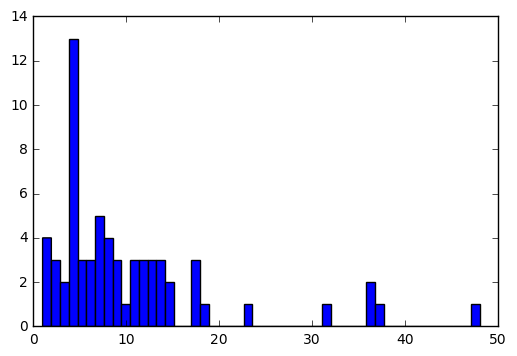

In [257]:
import matplotlib.pyplot as plot
#Note to Python 3, wrap the deg.values() with list(), since in Python 3, the dictonary is returning a view of the values only.
hist_plot=plot.hist(list(deg.values()),50)  

#### Degree Centrality
The degree centrality for a node v is the fraction of nodes it is connected to.

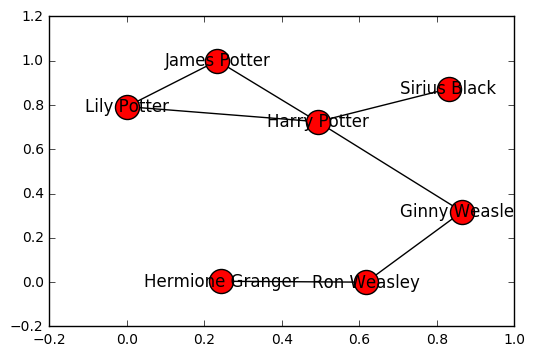

In [34]:
# Let's Calculate our degree centrality for the small graph
nx.draw_networkx(h)

In [35]:
nx.degree_centrality(h)

{'Ginny Weasley': 0.3333333333333333,
 'Harry Potter': 0.6666666666666666,
 'Hermione Granger': 0.16666666666666666,
 'James Potter': 0.3333333333333333,
 'Lily Potter': 0.3333333333333333,
 'Ron Weasley': 0.3333333333333333,
 'Sirius Black': 0.16666666666666666}

In [36]:
# Now for our larger graph
d=nx.degree_centrality(H)

In [37]:
ds=sorted_map(d)

In [38]:
ds[0:9]

[('Harry Potter', 0.75),
 ('Ron Weasley', 0.578125),
 ('Hermione Granger', 0.5625),
 ('Lord Voldemort', 0.5625),
 ('Albus Dumbledore', 0.5),
 ('Sirius Black', 0.359375),
 ('Ginny Weasley', 0.28125),
 ('Fred Weasley', 0.265625),
 ('George Weasley', 0.265625)]

#### Closeness Centrality
If a person is very close to all other people in the network, he/she should be central of the network. Such actor is able to desseminate and receive information fast, and move information from one side of the network to another.

Closeness centrality of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances n-1.

\begin{equation*}
C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)},
\end{equation*}
where d(v, u) is the shortest-path distance between v and u, and n is the number of nodes in the graph.

Notice that higher values of closeness indicate higher centrality.


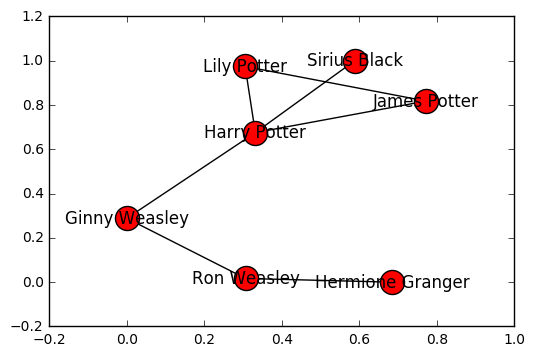

In [39]:
# Let's calculate the closeness centrality in our small graph
nx.draw_networkx(h)

In [41]:
nx.closeness_centrality(h)

{'Ginny Weasley': 0.6,
 'Harry Potter': 0.6666666666666666,
 'Hermione Granger': 0.3333333333333333,
 'James Potter': 0.46153846153846156,
 'Lily Potter': 0.46153846153846156,
 'Ron Weasley': 0.46153846153846156,
 'Sirius Black': 0.42857142857142855}

Anybody see the problem with this centrality meausre?

In [44]:
# Now let's compute it for our larger graph
c=nx.closeness_centrality(H)

In [45]:
cs=sorted_map(c)

In [46]:
# Top 10
cs[:9]

[('Harry Potter', 0.8),
 ('Ron Weasley', 0.7032967032967034),
 ('Hermione Granger', 0.6956521739130435),
 ('Lord Voldemort', 0.6881720430107527),
 ('Albus Dumbledore', 0.6530612244897959),
 ('Sirius Black', 0.5925925925925926),
 ('Ginny Weasley', 0.5714285714285714),
 ('Fred Weasley', 0.5663716814159292),
 ('George Weasley', 0.5663716814159292)]

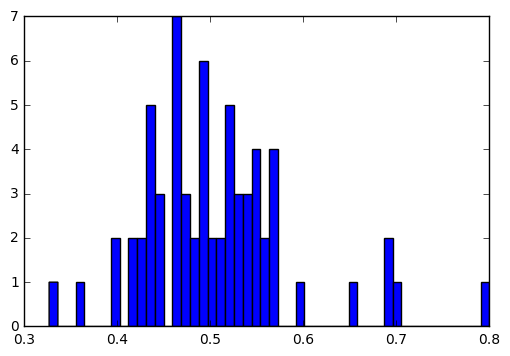

In [47]:
hist_plot=plot.hist(c.values(),50)  

#### Betweeness Centrality
A measurement based on communication flow, node on the communication path are important. Used to find boundary spanners - people that act as communication bridges between two communities.

Note: We are assuming that information always travels on the shortest paths!

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v:

\begin{equation*}
c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}
\end{equation*}

where V is the set of nodes, $\sigma(s, t)$ is the number of shortest (s, t)-paths, and $\sigma(s, t|v)$ is the number of those paths passing through some node v other than s, t. If s = t, $\sigma(s, t) = 1$, and if v in {s, t}, $\sigma(s, t|v) = 0$.

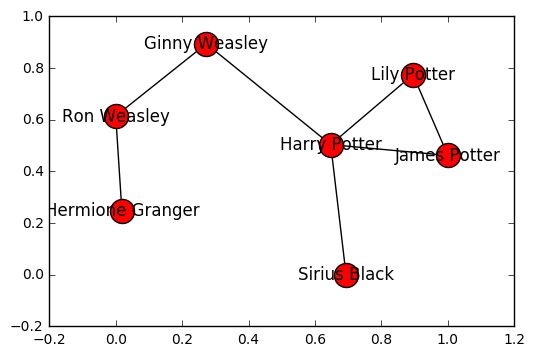

In [258]:
# Let's calculate the between centrality in our small graph
nx.draw_networkx(h)

In [49]:
nx.shortest_path(h)

{'Ginny Weasley': {'Ginny Weasley': ['Ginny Weasley'],
  'Harry Potter': ['Ginny Weasley', 'Harry Potter'],
  'Hermione Granger': ['Ginny Weasley', 'Ron Weasley', 'Hermione Granger'],
  'James Potter': ['Ginny Weasley', 'Harry Potter', 'James Potter'],
  'Lily Potter': ['Ginny Weasley', 'Harry Potter', 'Lily Potter'],
  'Ron Weasley': ['Ginny Weasley', 'Ron Weasley'],
  'Sirius Black': ['Ginny Weasley', 'Harry Potter', 'Sirius Black']},
 'Harry Potter': {'Ginny Weasley': ['Harry Potter', 'Ginny Weasley'],
  'Harry Potter': ['Harry Potter'],
  'Hermione Granger': ['Harry Potter',
   'Ginny Weasley',
   'Ron Weasley',
   'Hermione Granger'],
  'James Potter': ['Harry Potter', 'James Potter'],
  'Lily Potter': ['Harry Potter', 'Lily Potter'],
  'Ron Weasley': ['Harry Potter', 'Ginny Weasley', 'Ron Weasley'],
  'Sirius Black': ['Harry Potter', 'Sirius Black']},
 'Hermione Granger': {'Ginny Weasley': ['Hermione Granger',
   'Ron Weasley',
   'Ginny Weasley'],
  'Harry Potter': ['Hermione Gr

In [50]:
nx.betweenness_centrality(h)

{'Ginny Weasley': 0.5333333333333333,
 'Harry Potter': 0.7333333333333333,
 'Hermione Granger': 0.0,
 'James Potter': 0.0,
 'Lily Potter': 0.0,
 'Ron Weasley': 0.3333333333333333,
 'Sirius Black': 0.0}

In [51]:
b=nx.betweenness_centrality(H)

In [52]:
bs=sorted_map(b)

In [53]:
bs[:10]

[('Harry Potter', 0.28194042928218666),
 ('Lord Voldemort', 0.2034482729108245),
 ('Albus Dumbledore', 0.10049463200446779),
 ('Ron Weasley', 0.0985033961560281),
 ('Hermione Granger', 0.09399266713323916),
 ('Neville Longbottom', 0.044761736358432586),
 ('Luna Lovegood', 0.03125),
 ('Sirius Black', 0.027876140528856074),
 ('Rubeus Hagrid', 0.018898272750446844),
 ('Bellatrix Lestrange', 0.01706012642722423)]

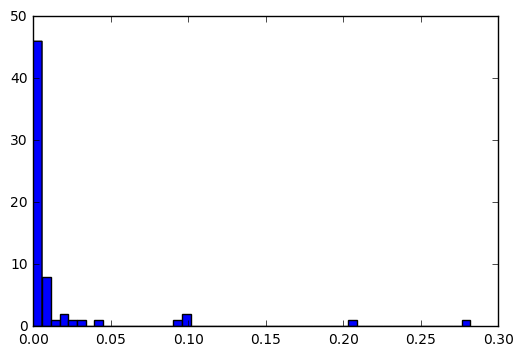

In [54]:
hist_plot=plot.hist(b.values(),50)  

In [55]:
pr=nx.pagerank(H)

In [56]:
prs=sorted_map(pr)

In [57]:
prs[:10]

[('Harry Potter', 0.06927352561544435),
 ('Lord Voldemort', 0.05207960990691942),
 ('Ron Weasley', 0.04929260499958992),
 ('Hermione Granger', 0.04883191064025201),
 ('Albus Dumbledore', 0.04468049950887841),
 ('Sirius Black', 0.030296369168343995),
 ('Ginny Weasley', 0.023350913151894213),
 ('Neville Longbottom', 0.022765621071219214),
 ('Molly Weasley', 0.02216284816491426),
 ('Fred Weasley', 0.021879798704437108)]

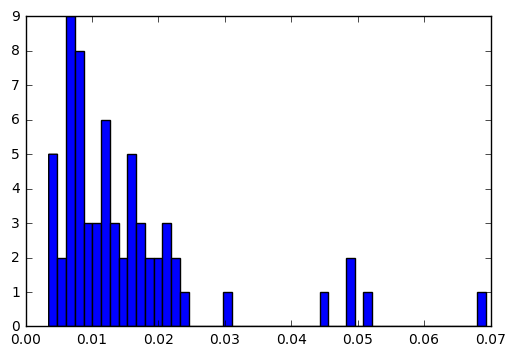

In [58]:
hist_plot=plot.hist(pr.values(),50)  

#### Now, Let's put them all together

In [59]:
# Put together top 10 characters in the centrality metrics we computed
top_characters = set([x[0] for x in degs[:10]] + [x[0] for x in ds[:10]] + [x[0] for x in cs[:10]] +[x[0] for x in bs[:10]])

In [60]:
# Look at their centralities
import pandas as pd
table = [[character, deg[character],d[character],c[character],b[character]] for character in top_characters]
df = pd.DataFrame(table)
cols = ['Character', 'Degree','Degree Centrality','Closeness Centrality','Betweeness Centrality']
df.columns = cols
df.sort_values(by='Degree', ascending=False)

,Character,Degree,Degree Centrality,Closeness Centrality,Betweeness Centrality
3,Harry Potter,48,0.750000,0.800000,0.281940
12,Ron Weasley,37,0.578125,0.703297,0.098503
1,Hermione Granger,36,0.562500,0.695652,0.093993
5,Lord Voldemort,36,0.562500,0.688172,0.203448
10,Albus Dumbledore,32,0.500000,0.653061,0.100495
2,Sirius Black,23,0.359375,0.592593,0.027876
4,Ginny Weasley,18,0.281250,0.571429,0.006459
7,George Weasley,17,0.265625,0.566372,0.003228
9,Molly Weasley,17,0.265625,0.566372,0.004404
11,Fred Weasley,17,0.265625,0.566372,0.003228
